<a href="https://colab.research.google.com/github/connorpheraty/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Connor_Heraty_DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

# Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

### Load the data into a pandas data frame

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2019-04-12 17:51:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.2’

crx.data.2          100%[===================>]  31.46K  --.-KB/s    in 0.03s   

2019-04-12 17:51:08 (1.00 MB/s) - ‘crx.data.2’ saved [32218/32218]



In [2]:
# Shorten the two largest strings for ease of analysis
import pandas as pd

df = pd.read_csv('crx.data', header = None, names = [
    'b,a',
    'continuous',
    'continuous',
    'u, y, l, t',
    'g, p, gg',
    'cat.1',
    'cat.2',
    'continuous',
    't, f',
    't, f',
    'continuous',
    't, f',
    'g, p, s',
    'continuous',
    'continuous',
    '+, -'
])

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


### Validate appropriate number of observations

In [3]:
# Per the UCI repository there should be 690 instances and 16 attributes (including the (+, -) column)
df.shape

(690, 16)

### Check for missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
b,a             690 non-null object
continuous      690 non-null object
continuous.1    690 non-null float64
u, y, l, t      690 non-null object
g, p, gg        690 non-null object
cat.1           690 non-null object
cat.2           690 non-null object
continuous.2    690 non-null float64
t, f            690 non-null object
t, f.1          690 non-null object
continuous.3    690 non-null int64
t, f.2          690 non-null object
g, p, s         690 non-null object
continuous.4    690 non-null object
continuous.5    690 non-null int64
+, -            690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [0]:
# Replace '?' strings with NaN values

import numpy as np
df = df.replace('?', np.NaN)

### Transform all continous columns into float values

In [0]:
# Transform all continuous values into floats
df[['continuous', 'continuous.1', 'continuous.2', 'continuous.3', 'continuous.4', 'continuous.5']] = df[['continuous', 'continuous.1', 'continuous.2', 'continuous.3', 'continuous.4', 'continuous.5']].astype(float)

In [7]:
# I am comfortable with the remaining null values because I can omit them in my tests
df.isnull().sum()

b,a             12
continuous      12
continuous.1     0
u, y, l, t       6
g, p, gg         6
cat.1            9
cat.2            9
continuous.2     0
t, f             0
t, f.1           0
continuous.3     0
t, f.2           0
g, p, s          0
continuous.4    13
continuous.5     0
+, -             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
b,a             678 non-null object
continuous      678 non-null float64
continuous.1    690 non-null float64
u, y, l, t      684 non-null object
g, p, gg        684 non-null object
cat.1           681 non-null object
cat.2           681 non-null object
continuous.2    690 non-null float64
t, f            690 non-null object
t, f.1          690 non-null object
continuous.3    690 non-null float64
t, f.2          690 non-null object
g, p, s         690 non-null object
continuous.4    677 non-null float64
continuous.5    690 non-null float64
+, -            690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


# Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

## Data Cleaning

In [0]:
# Create two seperate dataframes on the accepted/rejected column
df_accepted = df[df['+, -'] == '+']
df_rejected = df[df['+, -'] == '-']

In [10]:
df_accepted.head()

,"b,a",continuous,continuous.1,"u, y, l, t","g, p, gg",cat.1,cat.2,continuous.2,"t, f","t, f.1",continuous.3,"t, f.2","g, p, s",continuous.4,continuous.5,"+, -"
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [11]:
df_rejected.head()

,"b,a",continuous,continuous.1,"u, y, l, t","g, p, gg",cat.1,cat.2,continuous.2,"t, f","t, f.1",continuous.3,"t, f.2","g, p, s",continuous.4,continuous.5,"+, -"
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


## Continuous feature exploration

In [0]:
# Analyze mean differences between two dataframes
df_accepted_cont = df_accepted[['continuous', 'continuous.1', 'continuous.2', 'continuous.3', 'continuous.4', 'continuous.5']]
df_rejected_cont =df_rejected[['continuous', 'continuous.1', 'continuous.2', 'continuous.3', 'continuous.4', 'continuous.5']]

In [13]:
df_accepted_cont.dropna().apply(np.mean)

continuous        33.723278
continuous.1       5.980167
continuous.2       3.464565
continuous.3       4.682274
continuous.4     164.551839
continuous.5    1994.397993
dtype: float64

In [14]:
df_rejected_cont.dropna().apply(np.mean)

continuous       29.813978
continuous.1      3.835014
continuous.2      1.210245
continuous.3      0.648501
continuous.4    196.425068
continuous.5    187.280654
dtype: float64

## Continuous feature T Tests

In [15]:
from scipy import stats

# Continuous feature that is 'extremely' different between the two class labels (+ and -)
stats.ttest_ind(df_accepted['continuous.3'], df_rejected['continuous.3'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [16]:
# Continuous feature that is less significantly different between the two class labels (+ and -)
stats.ttest_ind(df_accepted['continuous.4'], df_rejected['continuous.4'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

## Categorical feature exploration

In [17]:
df_accepted['cat.1'].value_counts()

c     62
q     51
w     33
x     32
cc    29
aa    19
m     16
i     14
e     14
k     14
d      7
ff     7
j      3
r      2
Name: cat.1, dtype: int64

In [18]:
df_rejected['cat.1'].value_counts()

c     75
ff    46
i     45
k     37
aa    35
w     31
q     27
d     23
m     22
cc    12
e     11
j      7
x      6
r      1
Name: cat.1, dtype: int64

In [19]:
df.head()

,"b,a",continuous,continuous.1,"u, y, l, t","g, p, gg",cat.1,cat.2,continuous.2,"t, f","t, f.1",continuous.3,"t, f.2","g, p, s",continuous.4,continuous.5,"+, -"
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


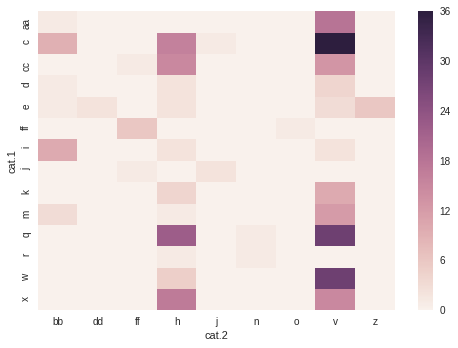

In [20]:
import seaborn as sns
accepted_tab = pd.crosstab(df_accepted['cat.1'], df_accepted['cat.2'] )

sns.heatmap(accepted_tab);

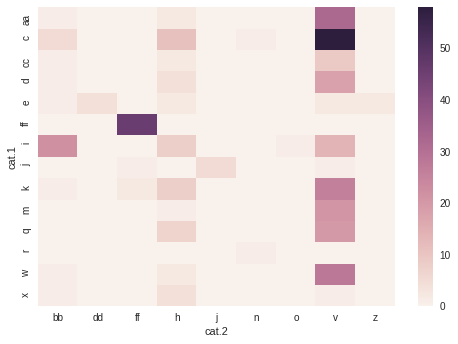

In [21]:
rejected_tab = pd.crosstab(df_rejected['cat.1'], df_rejected['cat.2'])

sns.heatmap(rejected_tab);

# 'ff' observation appears heavily concentrated on the rejection dataframe

## Categorical feature Chi Square Test

In [22]:
# The 't, f.2' value fits well within our expected distribution
contingency_table = pd.crosstab(df['+, -'], df['t, f.2'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 0.568273300792113
P-value: 0.45094587758631943
Degrees of Freedom: 1
Expected: 
 [[166.40289855 140.59710145]
 [207.59710145 175.40289855]]


In [23]:
# The 't, f' value contains the most extreme Chi-Squared and P-value and does not fit our expected distribution as well as other features.

contingency_table2 = pd.crosstab(df['+, -'], df['t, f'])

chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table2)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


# Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

### T-Tests

  Before we begin analysing the results of our t-tests, lets define what a two-sample t test is: **the two sample t-test is _specifically_ for testing the signifigance of two unknown averages with unknown stadard deviations.** We will be testing our null hypothesis that the means of the populations from which the two samples were taken are equal. We will set our threshold of accepting our null hypothesis at a p-value > **0.05.** <br>

The continuous feature whose means differed most significantly between the two class labels (accepted and rejected) was 'continous.3'. The p-value is well below our stated threshold and thus we **reject the null hypothesis.** It is likely that this feature is highly significant in determining whether an application is accepted.  <br>

The continuous feature whose means differred least significantly between the two class labels(accepted and rejected) is 'continous.4'. While it differed the least between the other features, it's p-value is still below our threshold of 0.05 and thus we **reject the null hypothesis. ** <br>

From the results of our tests, we can assume that all of the continuous variables are statistically significant and contribute to the decision to accept or reject a credit applicant.




###Chi-Squared

The Chi-Squared test tells us how likely it is that an **observed distribution is due to chance.** Specifically, it tells us how well an observed distribution fits into what we would expect the distribution to look like. A low chi-squared value means that our observed data fits our expected data extremely well. We will set our p-value threshold for determining signficance at **0.05.** <br>

The categorical feature that fit best into our expected distribution was the 't, f.2' feature. It contained a chi-squared value <1 and a p-value well above our threshold of 0.05. For our specific dataset, this tells us that the mean values for these features are not significantly different between the accepted and rejected categories.  

The categorical feature that fit our expected distribution the least was the 't, f' feature. It contained the largest chi-squared value at 355 and a p-value well below our threshold. This means that  the mean values for the accept/reject categories are significantly different. It is highly likely that the 't, f' feature is correlated with the decision to accept or reject an applicant. 

### Sprint Challenge


The most difficult part of the sprint challenge for me is writing out the explanations behind the various statistical tests. I also think that it is the most important element of this sprint challenge. Writing (with any degree of speed) has been a weakness of mine and I am happy that I have the opportunity to practice this very important element of data science.